In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
from sqlalchemy import create_engine
from hold import connection_string

In [3]:
engine = create_engine(f'{connection_string}', encoding='iso-8859-1', connect_args={'connect_timeout': 10})

In [4]:
gtdDF = pd.read_sql_table('global_terrorism', con= engine)

In [5]:
casualties = gtdDF['nkill'] + gtdDF['nwound']
casualties.sum()

554384.0

In [6]:
gtdDF['casualties'] = gtdDF['nkill'] + gtdDF['nwound']
gtdDF.head()

,iyear,imonth,iday,date,country_txt,region_txt,provstate,city,latitude,longitude,...,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,kidhijcountry,ransom,nkill,nwound,index1,casualties
0,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,NaN,0.0,7.0,1.0,7.0
1,2000,1,1,2000-01-01,Namibia,Sub-Saharan Africa,Kavango,Muitjiku,-17.91,19.99,...,Firearms,Unknown Gun Type,None,None,None,0.0,0.0,7.0,2.0,7.0
2,2000,1,1,2000-01-01,India,South Asia,Jammu and Kashmir,Udhampur,32.93,75.14,...,Firearms,Unknown Gun Type,None,None,None,NaN,1.0,2.0,3.0,3.0
3,2000,1,1,2000-01-01,Kosovo,Eastern Europe,Kosovo (Province),Peje,42.66,20.31,...,Explosives/Bombs/Dynamite,Unknown Explosive Type,None,None,None,NaN,0.0,1.0,4.0,1.0
4,2000,1,1,2000-01-01,Somalia,Sub-Saharan Africa,Banaadir,Mogadishu,2.11,45.39,...,Firearms,Unknown Gun Type,None,None,None,NaN,6.0,10.0,5.0,16.0


In [7]:
RegionCasualtiesDF = gtdDF[['index1','region_txt','casualties']]
RegionCasualtiesDF.head()

,index1,region_txt,casualties
0,1.0,Sub-Saharan Africa,7.0
1,2.0,Sub-Saharan Africa,7.0
2,3.0,South Asia,3.0
3,4.0,Eastern Europe,1.0
4,5.0,Sub-Saharan Africa,16.0


In [8]:
RegionCasualties2DF = pd.get_dummies(RegionCasualtiesDF)
RegionCasualties2DF.head()

,index1,casualties,region_txt_Australasia & Oceania,region_txt_Central America & Caribbean,region_txt_Central Asia,region_txt_East Asia,region_txt_Eastern Europe,region_txt_Middle East & North Africa,region_txt_North America,region_txt_South America,region_txt_South Asia,region_txt_Southeast Asia,region_txt_Sub-Saharan Africa,region_txt_Western Europe
0,1.0,7.0,0,0,0,0,0,0,0,0,0,0,1,0
1,2.0,7.0,0,0,0,0,0,0,0,0,0,0,1,0
2,3.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0
3,4.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0
4,5.0,16.0,0,0,0,0,0,0,0,0,0,0,1,0


In [9]:
RegionCasualtiesMergeDF = result = pd.merge(RegionCasualties2DF,RegionCasualtiesDF[['index1','region_txt']],on='index1')
RegionCasualtiesMergeDF = RegionCasualtiesMergeDF.rename(columns={
    'region_txt_Australasia & Oceania':'Australasia & Oceania', 
    'region_txt_Central America & Caribbean': 'Central America & Caribbean',
    'region_txt_Central Asia':'Central Asia',
    'region_txt_East Asia':'East Asia',
    'region_txt_Eastern Europe':'Eastern Europe',
    'region_txt_Middle East & North Africa':'Middle East & North Africa',
    'region_txt_North America':'North America',
    'region_txt_South America':'South America',
    'region_txt_South Asia':'South Asia',
    'region_txt_Southeast Asia':'Southeast Asia',
    'region_txt_Sub-Saharan Africa':'Sub-Saharan Africa',
    'region_txt_Western Europe':'Western Europe'
})
RegionCasualtiesMergeDF.head()

,index1,casualties,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe,region_txt
0,1.0,7.0,0,0,0,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa
1,2.0,7.0,0,0,0,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa
2,3.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,South Asia
3,4.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,Eastern Europe
4,5.0,16.0,0,0,0,0,0,0,0,0,0,0,1,0,Sub-Saharan Africa


In [10]:
# Assign X (data) and y (target)
data = RegionCasualtiesMergeDF.drop(["index1","region_txt",'casualties'], axis=1)
target = RegionCasualtiesMergeDF["region_txt"]
feature_names = data.columns

print(data.shape, target.shape)

(92700, 12) (92700,)


In [11]:
# Split the data into training and testing
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
### END SOLUTION

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

1.0

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.3220377775275151, 'Middle East & North Africa'),
 (0.2718594289158842, 'South Asia'),
 (0.12872108113251188, 'Southeast Asia'),
 (0.12390195724363448, 'Sub-Saharan Africa'),
 (0.05778681194151699, 'Eastern Europe'),
 (0.0428748706710355, 'Western Europe'),
 (0.032889453615883316, 'South America'),
 (0.009817760999295728, 'North America'),
 (0.0038832748377070963, 'Central Asia'),
 (0.0034407082715859215, 'East Asia'),
 (0.0015627232949996842, 'Central America & Caribbean'),
 (0.0012241515484298707, 'Australasia & Oceania')]

In [15]:
RFRegionDF = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True), columns = ['Probability', 'Region'])
RFRegionDF

,Probability,Region
0,0.322038,Middle East & North Africa
1,0.271859,South Asia
2,0.128721,Southeast Asia
3,0.123902,Sub-Saharan Africa
4,0.057787,Eastern Europe
5,0.042875,Western Europe
6,0.032889,South America
7,0.009818,North America
8,0.003883,Central Asia
9,0.003441,East Asia


In [16]:
pies = RFRegionDF['Region'].head(7)
pie_slices = RFRegionDF['Probability'].head(7)
colors = ["lightskyblue","orange","pink","yellowgreen","green","lightcoral","silver"]
          #"lightskyblue"
          #,"lightcoral","lightyellow","silver"]
explode = (0.1,0,0,0,0,0,0)

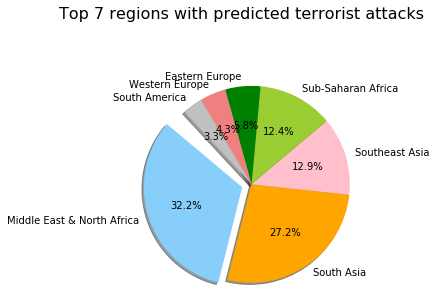

In [17]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(pie_slices, explode=explode, labels=pies, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen

plt.savefig("../GTA/front_end/static/front_end/assets/visualizations/ML7_Region_Attacks_Pie_RF")
plt.suptitle('Top 7 regions with predicted terrorist attacks', size=16, y=1.12) 
plt.show()